# **Parametric Hypothesis Tests**

## **Assumptions for Choosing a Parametric Hypothesis Test**

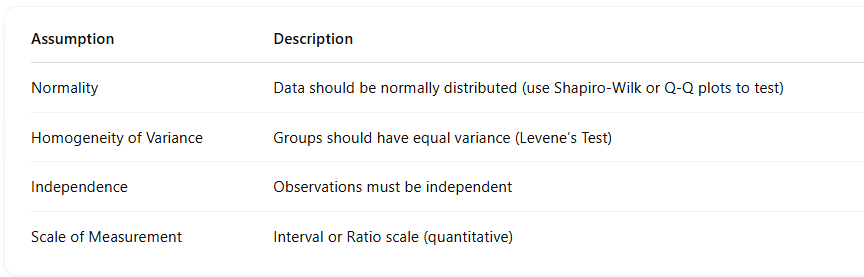

## **When to Perform which Parametrics Test?**

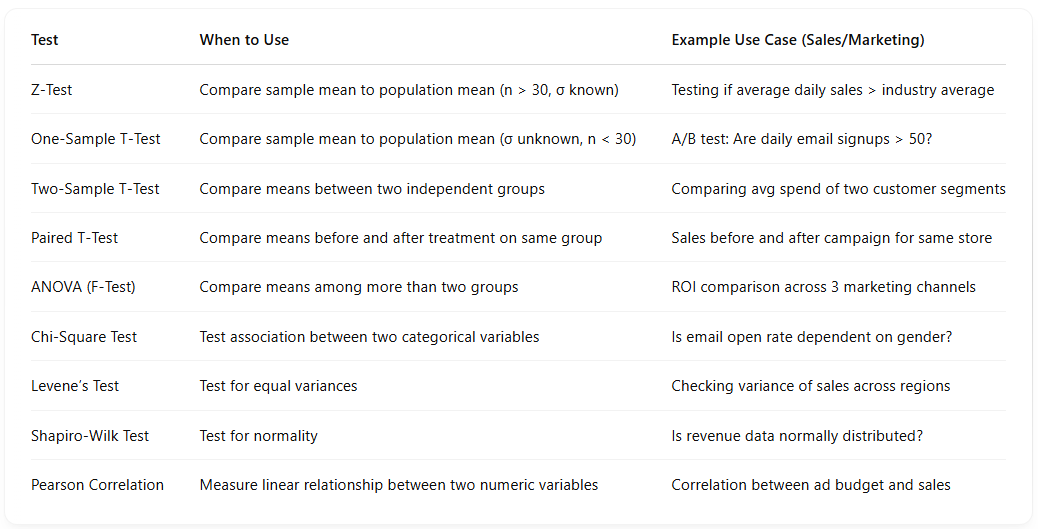

## **Generating Synthetic Data and Performing the Tests**

In [45]:
import pandas as pd
import numpy as np

# Sample Dataset
np.random.seed(42)
sales_data = pd.DataFrame({
    'region': np.random.choice(['North', 'South', 'East', 'West'], 300),
    'campaign_type': np.random.choice(['Email', 'Socialmedia', 'TV'], 300),
    'before_sales': np.random.normal(1000, 300, 300),
    'after_sales': np.random.normal(1100, 250, 300),
    'email_open': np.random.choice(['Yes', 'No'], 300),
    'gender': np.random.choice(['Male', 'Female'], 300),
    'ad_spend': np.random.normal(5000, 1500, 300),
    'revenue': np.random.normal(7000, 1800, 300),
})


In [2]:
sales_data.head(10)

,region,campaign_type,before_sales,after_sales,email_open,gender,ad_spend,revenue
0,East,Email,1341.105226,1238.133288,Yes,Male,5286.406626,7659.622899
1,West,Email,1134.067043,1173.887613,Yes,Male,3658.155151,6537.481917
2,North,TV,656.515444,1276.981092,No,Female,3678.339276,8819.552033
3,East,Socialmedia,1177.394835,1652.112631,No,Female,7423.937755,6765.072856
4,East,Socialmedia,735.076402,1599.512386,No,Male,7957.503126,5912.189671
5,West,Email,790.186585,705.119811,Yes,Female,4680.296995,6863.528688
6,North,Socialmedia,874.447336,797.374710,Yes,Male,5101.630359,8967.523456
7,North,Socialmedia,966.574367,696.647336,No,Female,5600.171712,8035.665329
8,East,TV,536.882379,913.223028,Yes,Male,5222.047637,2618.975938
9,South,TV,1335.068032,1113.729825,Yes,Female,2488.553419,7334.381486


### **Shapiro-Wilk Test for Normality**

**When to Use:** Validate normality of a sample

**Hypotheses:**

H₀: Data is normal

H₁: Data is not normal

In [3]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Check if revenue is normally distributed
stat, p = shapiro(sales_data['revenue'])
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Likely normal (p > 0.05)")
else:
    print("❌ Not normal (p < 0.05)")


Shapiro-Wilk Test: Statistic=0.9907, p-value=0.0544
✔️ Likely normal (p > 0.05)


"The Shapiro-Wilk test yielded a statistic of 0.9907 and a p-value of 0.0544, indicating that the data does not significantly deviate from normality (p > 0.05).So we can say the data is Normal."

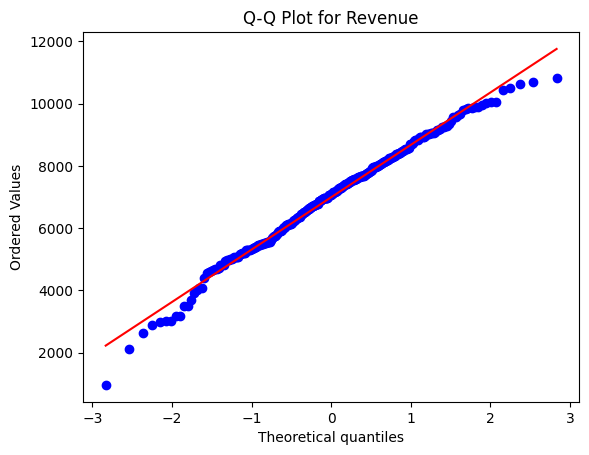

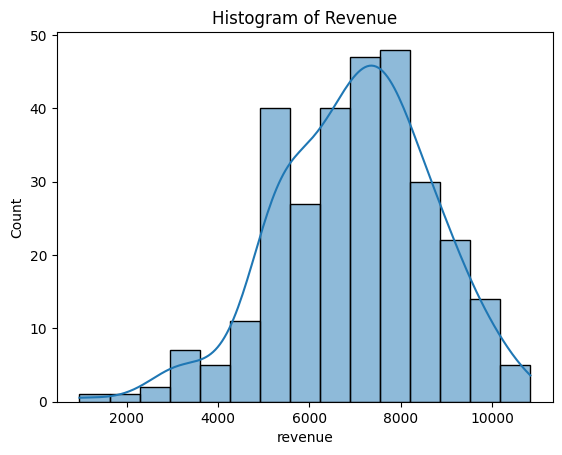

In [ ]:
# Q-Q plot
stats.probplot(sales_data['revenue'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Revenue")
plt.show()

# Histogram
sns.histplot(sales_data['revenue'], kde=True)
plt.title("Histogram of Revenue")
plt.show()


###**Levene’s Test for Equal Variance [Homogeneity of Variance]**

In [ ]:
from scipy.stats import levene

# Revenue across two regions
north = sales_data[sales_data['region'] == 'North']['revenue']
south = sales_data[sales_data['region'] == 'South']['revenue']

stat, p = levene(north, south)
print(f"Levene’s Test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Equal variance (p > 0.05)")
else:
    print("❌ Unequal variance (p < 0.05)")



Levene’s Test: Statistic=0.0220, p-value=0.8823
✔️ Equal variance (p > 0.05)


###**1. Two-Sample T-Test (Independent Groups)**

**When to Use:** Compare means of two independent groups (e.g., Region A vs Region B)

**Assumptions:**

✅ Data in both groups is normally distributed (Shapiro-Wilk)

✅ Equal variances (Levene's Test)

✅ Independent groups

**Hypotheses:**

H₀: μ₁ = μ₂ (no difference in means)

H₁: μ₁ ≠ μ₂ (means are different)


**Interpretation:**

If p < 0.05 → reject H₀ → there is a statistically significant difference in revenue between North and South.

In [ ]:
from scipy.stats import ttest_ind

# Step 1: Check normality
for region in ['North', 'South']:
    stat, p = shapiro(sales_data[sales_data['region'] == region]['revenue'])
    print(f"{region} Shapiro-Wilk p = {p:.4f}")

# Step 2: Check variance equality
north = sales_data[sales_data['region'] == 'North']['revenue']
south = sales_data[sales_data['region'] == 'South']['revenue']
stat, p = levene(north, south)
print(f"Levene’s p = {p:.4f}")

# Step 3: Perform t-test
stat, p = ttest_ind(north, south, equal_var=(p > 0.05))
print(f"t-test: Statistic = {stat:.4f}, p-value = {p:.4f}")


North Shapiro-Wilk p = 0.0051
South Shapiro-Wilk p = 0.5881
Levene’s p = 0.8823
t-test: Statistic = -0.9383, p-value = 0.3497


**Since the p-value of the Independent Sample t-test is greater than 0.05 (0.3497) we can conclude that the test is insigficant at 5% level of significance. Hence, the Average Revenue of North and South group isn't significantly different at 5% level of significance.**

###**2. Paired T-Test (Before vs After Campaign)**

**When to Use:** Compare before/after sales in the same region

**Assumptions:**

- Normality of the differences

- Paired data (dependent samples)

**Hypotheses:**

H₀: μ₁ - μ₂ = 0

H₁: μ₁ - μ₂ ≠ 0

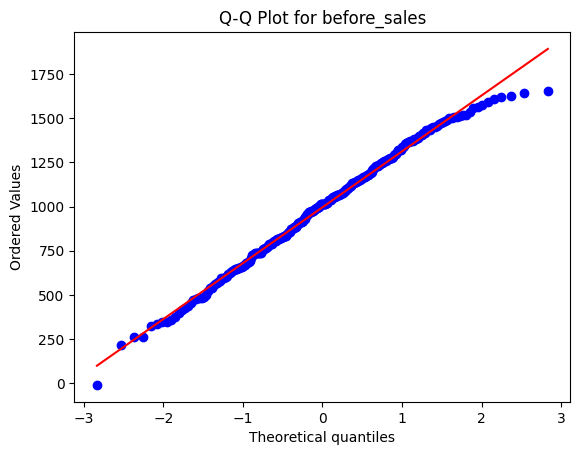

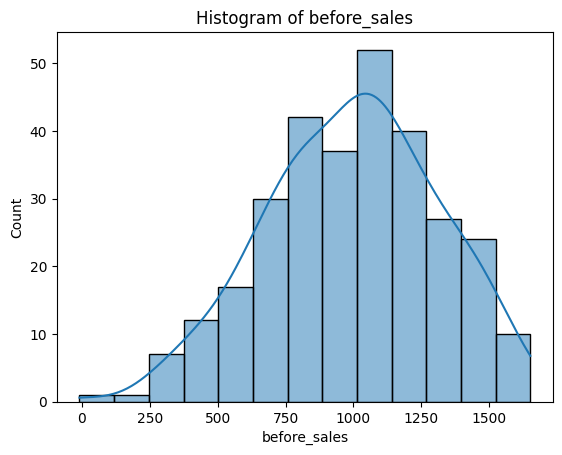

In [35]:
# Q-Q plot
stats.probplot(sales_data['before_sales'], dist="norm", plot=plt)
plt.title("Q-Q Plot for before_sales")
plt.show()

#
# Histogram
sns.histplot(sales_data['before_sales'], kde=True)
plt.title("Histogram of before_sales")
plt.show()

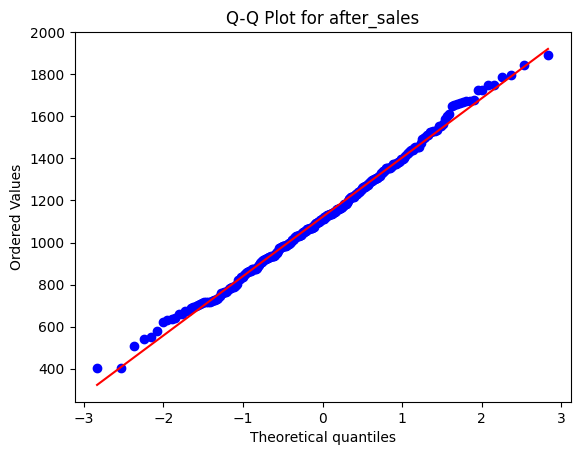

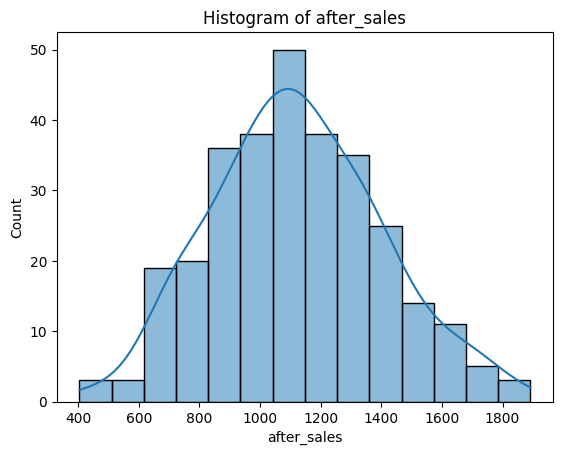

In [37]:

# Q-Q plot
stats.probplot(sales_data['after_sales'], dist="norm", plot=plt)
plt.title("Q-Q Plot for after_sales")
plt.show()


# Histogram
sns.histplot(sales_data['after_sales'], kde=True)
plt.title("Histogram of after_sales")
plt.show()

In [ ]:
#chake normality for befor_sales
print("before_sales")
stat, p = shapiro(sales_data['before_sales'])
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Likely normal (p > 0.05)")
else:
    print("❌ Not normal (p < 0.05)")

Shapiro-Wilk Test: Statistic=0.9922, p-value=0.1159
✔️ Likely normal (p > 0.05)


We see that the p_value is 0.1159 . p is gatterthen 0.05. So we say data flow normality.

In [ ]:
#chake normality for after_sales
print("before_sales")
stat, p = shapiro(sales_data['after_sales'])
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Likely normal (p > 0.05)")
else:
    print("❌ Not normal (p < 0.05)")

before_sales
Shapiro-Wilk Test: Statistic=0.9948, p-value=0.4097
✔️ Likely normal (p > 0.05)


P_value gaterthen 0.05. So after_sales flow Normality.

In [ ]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(sales_data['before_sales'], sales_data['after_sales'])
print(f"Paired T-Test: t-stat={t_stat:.4f}, p-value={p_val:.4f}")


Paired T-Test: t-stat=-5.2068, p-value=0.0000


**Since the p-value of the paired (dependent samples) t-test is less than 0.05 (0.000) we can conclude that the test is sigficant at 5% level of significance. Hence, the difference between the before and after sales of campaigns is significantly different at 5% level of significance.**

###**3. ANOVA**

**When to Use:** Compare more than 2 groups

**Assumptions:**

- Normality in all groups

- Equal variances

- Independence

**Hypotheses:**

H₀: All group means are equal

H₁: At least one differs

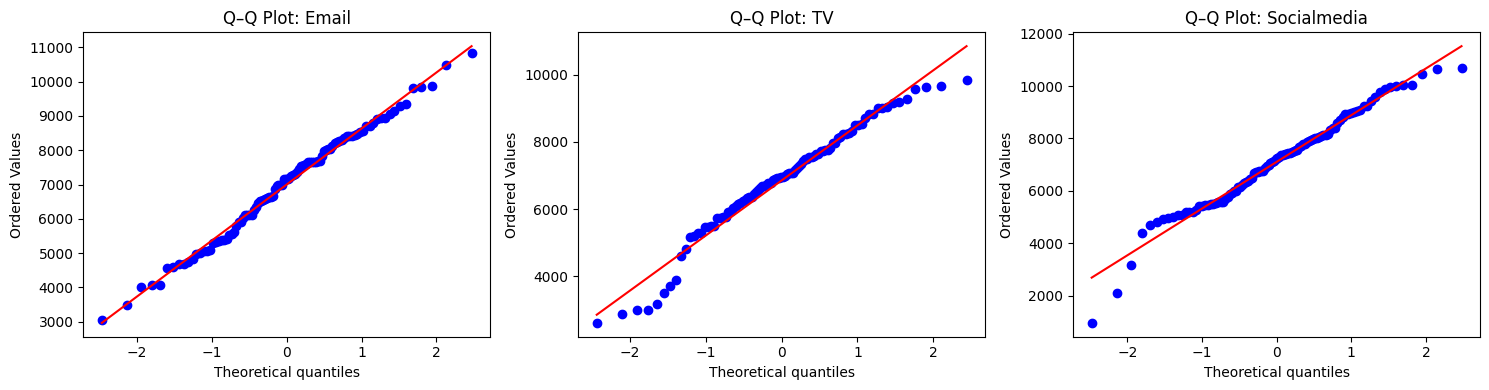

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats

campaigns = sales_data['campaign_type'].unique()
plt.figure(figsize=(15, 4))

for i, campaign in enumerate(campaigns):
    plt.subplot(1, len(campaigns), i + 1)
    stats.probplot(sales_data[sales_data['campaign_type'] == campaign]['revenue'], dist="norm", plot=plt)
    plt.title(f'Q–Q Plot: {campaign}')

plt.tight_layout()
plt.show()


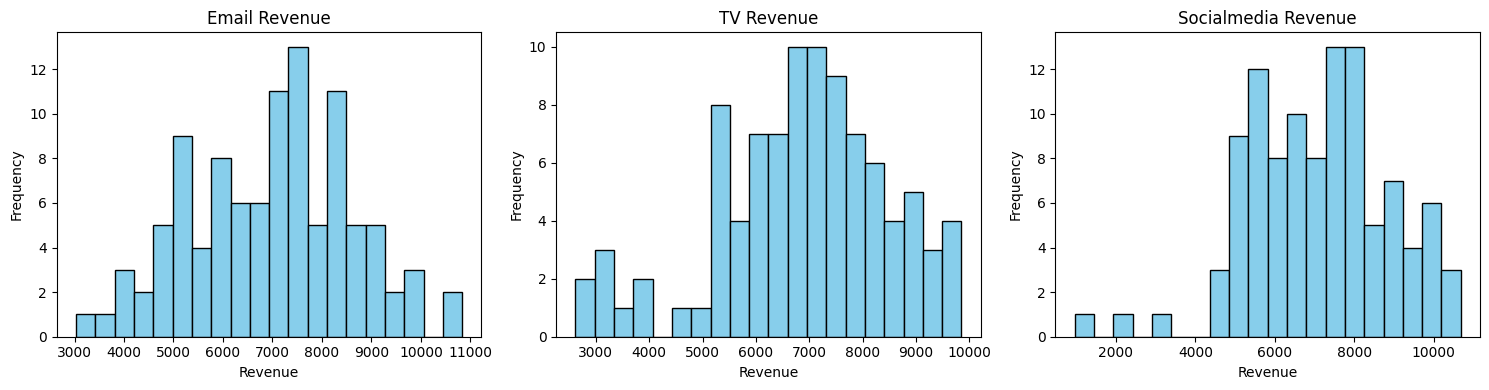

In [17]:
import matplotlib.pyplot as plt

# Set up the plot
campaigns = sales_data['campaign_type'].unique()
plt.figure(figsize=(15, 4))

for i, campaign in enumerate(campaigns):
    plt.subplot(1, len(campaigns), i + 1)
    data = sales_data[sales_data['campaign_type'] == campaign]['revenue']
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{campaign} Revenue')
    plt.xlabel('Revenue')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [6]:
from scipy.stats import shapiro

# Group by campaign_type and test normality for 'revenue'
for campaign in sales_data['campaign_type'].unique():
    subset = sales_data[sales_data['campaign_type'] == campaign]['revenue']
    stat, p = shapiro(subset)
    print(f"Shapiro-Wilk Test for {campaign}: W={stat:.3f}, p={p:.3f}")

Shapiro-Wilk Test for Email: W=0.991, p=0.718
Shapiro-Wilk Test for TV: W=0.965, p=0.013
Shapiro-Wilk Test for Socialmedia: W=0.977, p=0.063


We can see that the P_value of the emmer is 0.718 .we know that if the P_value is 0.05 then normality follows.
*Email is Normal(P_value>0.05).
TV is Normal (P_value>0.05) but just barely.
amd TV is not Normal (P_value<0.05)
Finally, We can see At least one differs.

In [47]:
from scipy.stats import levene

# Extract revenue data by campaign_type
email = sales_data[sales_data['campaign_type'] == 'Email']['revenue']
tv = sales_data[sales_data['campaign_type'] == 'TV']['revenue']
social = sales_data[sales_data['campaign_type'] == 'Socialmedia']['revenue']

# Perform Levene's test
stat, p = levene(email, tv, social)
print(f"Levene’s Test for Equal Variances: W={stat:.3f}, p={p:.3f}")


Levene’s Test for Equal Variances: W=0.559, p=0.573


#✅ Interpretation

Metric	Value	Interpretation
W-statistic	0.559	Test statistic (used internally by the test)
p-value	0.573	> 0.05, so we do not reject the null hypothesis

#🧠 What This Means:
The null hypothesis of Levene’s Test is that all group variances are equal.

Since p = 0.573 > 0.05, there's no significant difference in variance between the revenue distributions for the campaign types.

#✅ Conclusion:
The assumption of equal variances is met, so it's statistically acceptable to proceed with ANOVA.

Finaly we can say::

Normality: Mostly met (one group borderline)

Equal variances:✅ Met

➡️ You're clear to run One-Way ANOVA.

In [46]:
from scipy.stats import f_oneway

email = sales_data[sales_data['campaign_type'] == 'Email']['revenue']
social = sales_data[sales_data['campaign_type'] == 'Socialmedia']['revenue']
tv = sales_data[sales_data['campaign_type'] == 'TV']['revenue']

f_stat, p_val = f_oneway(email, social, tv)
print(f"ANOVA: F-stat={f_stat:.4f}, p-value={p_val:.4f}")

ANOVA: F-stat=0.5556, p-value=0.5743


P_value is much greater than 0.05.we fail to reject the null hypothesis.So,Mean revenue is equal across all campaign types (Email, Socialmedia, TV).

In [39]:
#Another Way of Running ANOVA:
from scipy.stats import f_oneway

grouped = sales_data.groupby('campaign_type')['revenue'].apply(list)
stat, p = f_oneway(*grouped)
print(f"ANOVA: Statistic = {stat:.4f}, p-value = {p:.4f}")

ANOVA: Statistic = 0.5556, p-value = 0.5743


###**6. Correlation Coefficient**

In [18]:
correlation_coefficient = sales_data['ad_spend'].corr(sales_data['revenue'])
correlation_coefficient

np.float64(0.01738150456449225)

**Hypotheses:**

H₀: ρ (rho) = 0

H₁: ρ (rho) != 0

In [22]:
from scipy.stats import pearsonr
corr, p_val = pearsonr(sales_data['ad_spend'], sales_data['revenue'])
print(f"Pearson Correlation: r={corr:.4f}, p-value={p_val:.4f}")

Pearson Correlation: r=0.0174, p-value=0.7643


**Since, p>0.05 we are failed to reject the null hypothesis at 5% level of significance. Hence, we may conclude that the Correlation Coefficient between Ad Spend and Revenue isn't significantly strong.**

# **Non-Parametric Hypothesis Tests**

##**When to Use Non-Parametrics Tests over Parametric Tests?**

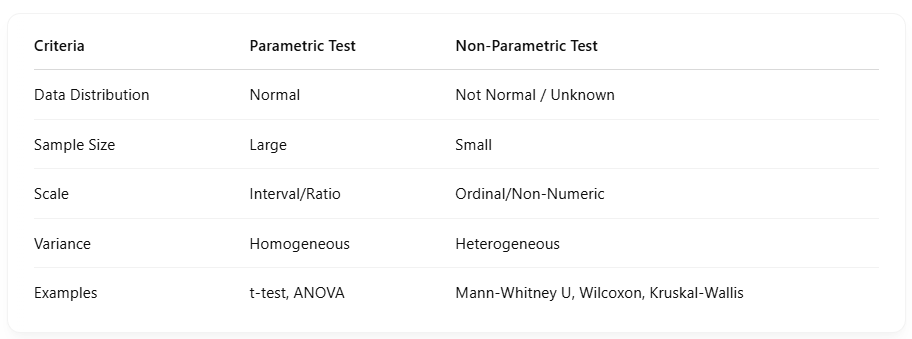

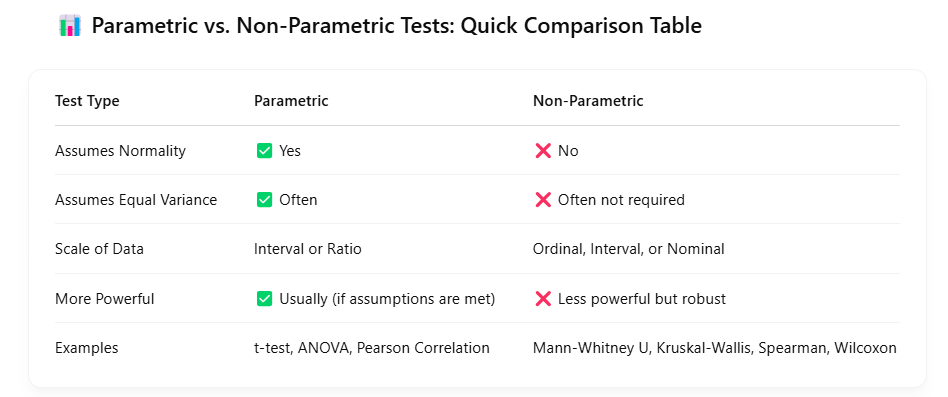

##**Non-Parametric Tests Overview**

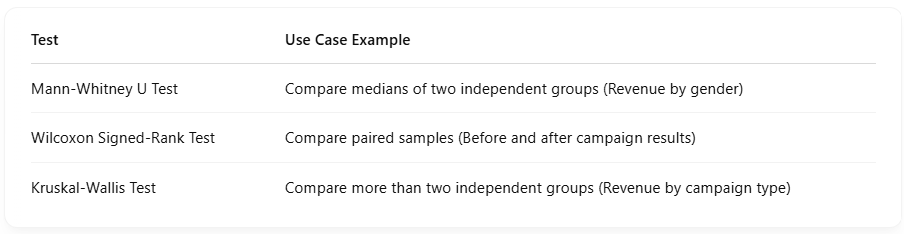

###**1. Mann-Whitney U Test (Non-parametric alternative to Two-Sample t-test)**

**When to Use:** Same goal as above, but normality not assumed

**Assumptions:**

- Ordinal or continuous scale

- Independent samples

**Hypotheses:**

H₀: Distributions are equal (no difference)

H₁: Distributions are different

In [24]:
from scipy.stats import mannwhitneyu
north = sales_data[sales_data['region'] == 'North']['revenue']
south = sales_data[sales_data['region'] == 'South']['revenue']
stat, p = mannwhitneyu(north, south, alternative='two-sided')
print(f"Mann–Whitney U: Statistic = {stat:.4f}, p-value = {p:.4f}")


Mann–Whitney U: Statistic = 2374.0000, p-value = 0.5634


p < 0.05: ❌ Reject H₀ → Significant difference between North and South revenues.

###**2. Wilcoxon Signed-Rank Test (Non-parametric paired test)**

#🧠 What the Wilcoxon Test Does
It tests the null hypothesis that the median difference between paired observations is zero:

H₀ (Null Hypothesis): No difference between before_sales and after_sales (i.e., median difference = 0).

H₁ (Alternative Hypothesis): There is a difference.


#📊 Interpretation Guide
p-value	   and  Interpretation                                                  

p < 0.05	  ❌ Reject H₀ → Significant change between before and after

p ≥ 0.05	  ✅ Fail to reject H₀ → No significant change detected

⚠️ Important Assumptions:

Observations are paired and come from the same subjects.

Differences are symmetrically distributed around the median.



In [25]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(sales_data['before_sales'], sales_data['after_sales'])
print(f"Wilcoxon Signed-Rank: Statistic = {stat:.4f}, p-value = {p:.4f}")


Wilcoxon Signed-Rank: Statistic = 15202.0000, p-value = 0.0000


p-value = 0.0000 is
This p-value is far below the typical alpha level of 0.05.

So, you reject the null hypothesis.

###**3. Kruskal-Wallis Test (Non-parametric ANOVA)**

#✅ What This Test Does:
The Kruskal–Wallis test checks if there's a statistically significant difference in the distributions (not means) across more than two independent groups.

You're comparing:

email → revenue from the "Email" campaign

social → revenue from "Socialmedia"

tv → revenue from "TV"

#🧠 Hypotheses
H₀ (Null Hypothesis): All groups have equal distributions of revenue.

H₁ (Alternative Hypothesis): At least one group differs significantly.

#Interpretation:

If p < 0.05: ❌ Reject H₀ → At least one campaign type has a different revenue distribution.

If p ≥ 0.05: ✅ Fail to reject H₀ → No significant difference.



In [28]:
from scipy.stats import kruskal

stat, p = kruskal(email, social, tv)
print(f"Kruskal-Wallis Test: Statistic={stat:.4f}, p-value={p:.4f}")


Kruskal-Wallis Test: Statistic=0.6616, p-value=0.7184


We can say P>0.05 so,we reject NUll Hypothesis and At least one campaign type has a different revenue distribution

###**4. Chi-Square Test of Independence**

#✅ Typical Use Case
Let’s say you're checking the relationship between:

campaign_type (Email, TV, Socialmedia)

email_open (Yes, No)

#🧠 What the Test Tells You
H₀ (Null Hypothesis): The two variables are independent (no association).

H₁ (Alternative Hypothesis): The variables are associated.


📊 Interpretation of Output

Variable	   Meaning

chi2	      Chi-square test statistic (χ² value)

p        	  p-value – probability of observing this result by chance

dof	        Degrees of freedom

expected	  The expected frequencies if variables were independent

If:

p < 0.05 → ❌ Reject H₀ → There is a significant relationship.

p ≥ 0.05 → ✅ Fail to reject H₀ → No significant relationship.

In [29]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(sales_data['gender'], sales_data['email_open'])
contingency


email_open,No,Yes
gender,,
Female,75,82
Male,78,65


In [30]:
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square: χ²={chi2:.4f}, p-value={p:.4f}")

Chi-Square: χ²=1.1167, p-value=0.2906


There is a significant association between campaign_type and email_open.

### **5. Chi-Square Goodness of Fit Test**

**When to Use:** Does observed frequency differ from expected?

It is used to determine if there's a significant difference between observed data and expected data when dealing with categorical variables.


**Hypotheses:**

H₀: Observed = Expected

H₁: Observed ≠ Expected

In [33]:
from scipy.stats import chisquare

observed = [100, 98, 116]  # Observed customers across 3 campaigns
expected = [116, 108, 115]

# Ensure the sum of expected frequencies equals the sum of observed frequencies
expected[-1] = sum(observed) - sum(expected[:-1])  # Adjust the last expected value

stat, p = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-square Goodness of Fit: Stat={stat:.4f}, p={p:.4f}")

Chi-square Goodness of Fit: Stat=10.6439, p=0.0049


Chi-square statistic = 10.6439 → Measures how far observed counts deviate from expected.

p-value = 0.0049 → < 0.05, which means the difference is statistically significant.

Since p < 0.05, you reject the null hypothesis.
This means the observed distribution is significantly different from the expected distribution.